## **Objective**

- To find out the relation between severity of accidents and road conditions to see if it impacts the severity in any way.
-  To see if the weather conditions play affect the crashes in any way.

### **Loading Libraries**

In [ ]:
# to handle  data retrieval
import urllib3
from urllib3 import request

# to handle certificate verification
import certifi

# for pandas dataframes
import pandas as pd


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
sns.set()

### **Loading Dataset**

In [ ]:
df_vehcrash = pd.read_csv('/content/drive/MyDrive/601 Project Data/Maryland_Statewide_Vehicle_Crashes (1).csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_person = pd.read_csv('/content/drive/MyDrive/601 Project Data/Maryland_Statewide_Vehicle_Crashes_-_Person_Details__Anonymized_.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_vehdetails = pd.read_csv('/content/drive/MyDrive/601 Project Data/Maryland_Statewide_Vehicle_Crashes_-_Vehicle_Details.csv')

### **Lowercasing Columns**

In [ ]:
# Lowercase all columns
df_vehcrash.columns = map(str.lower, df_vehcrash.columns)

In [ ]:
# Lowercase all columns
df_person.columns = map(str.lower, df_person.columns)

In [ ]:
# Finding columns with more than 90% missing values in vehicle crash dataset
set(df_vehcrash.columns[df_vehcrash.isnull().mean()>= 0.90])

{'muni_desc', 'reference_suffix', 'rte_suffix'}

In [ ]:
# Finding columns with more than 90% missing values in vehicle person dataset
set(df_person.columns[df_person.isnull().mean()>= 0.90])

{'alcohol_testtype_code',
 'alcohol_testtype_desc',
 'bac_code',
 'drug_testresult_code',
 'drug_testresult_desc',
 'movement_code',
 'movement_desc',
 'ped_location_code',
 'ped_obey_code',
 'ped_obey_desc',
 'ped_type_code',
 'ped_type_desc',
 'ped_visible_code',
 'ped_visible_desc'}

#### **Visualizing null values**

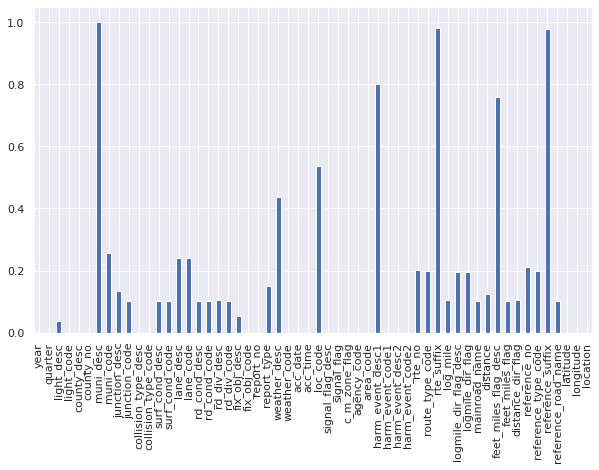

In [ ]:
plt.figure(figsize=(10,6));
null_price = df_vehcrash.isnull().sum()
(null_price/df_vehcrash.shape[0]).plot(kind='bar');

In [ ]:
newdf2.groupby('weather_desc')['inj_sever_code'].mean()

weather_desc
Blowing Sand, Soil, Dirt    1.280899
Blowing Snow                1.281269
Clear                       1.284406
Cloudy                      1.293351
Foggy                       1.335185
Not Applicable              1.268064
Other                       1.288684
Raining                     1.279387
Severe Winds                1.292165
Sleet                       1.281813
Snow                        1.217753
Unknown                     1.057132
Wintry Mix                  1.307085
Name: inj_sever_code, dtype: float64

In [ ]:
# Dropping null value columns
df_vehcrash.drop(['muni_desc', 'reference_suffix', 'rte_suffix'], axis=1, inplace=True)

KeyError: ignored

In [ ]:
df_vehcrash['surf_cond_desc'].value_counts(normalize=True)

Dry                  0.735343
Wet                  0.188948
Not Applicable       0.041511
Snow                 0.012439
Ice                  0.011789
Unknown              0.008144
Other                0.001145
Mud, Dirt, Gravel    0.000679
Name: surf_cond_desc, dtype: float64

In [ ]:
df_person_new = df_person[['report_no', 'inj_sever_desc','inj_sever_code']]

In [ ]:
df_vehcrash_new = pd.merge(df_vehcrash, df_person_new, left_on = 'report_no', right_on= 'report_no', how = 'left' )

In [ ]:
newdf=pd.DataFrame(data=df_vehcrash_new,columns=['surf_cond_desc','collision_type_desc','surf_cond_desc','acc_time','inj_sever_code','weather_code','weather_desc',  'rd_cond_desc'])


In [ ]:
#creating function to add hour column
def hour(string):
    s=string[0:2]
    return int(s)
newdf['hour']=newdf['acc_time'].apply(lambda x: hour(x))

In [ ]:
#creating function to identify time of day: morning, afternoon, evening, night, etc.
def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,17):
        return 'Afternoon'
    elif n in range(17,20):
        return 'Evening'
    elif n in range(20,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'

In [ ]:
newdf['Time_of_Day']=newdf['hour'].apply(lambda x: time_of_day(x))


In [ ]:
newdf.dropna

<bound method DataFrame.dropna of         surf_cond_desc       collision_type_desc  ... hour    Time_of_Day
0                  NaN                     Other  ...   15      Afternoon
1                  Dry                     Other  ...    6  Early Morning
2                  Dry                     Other  ...    6  Early Morning
3                  Dry                     Other  ...    6  Early Morning
4                  Dry                     Other  ...    6  Early Morning
...                ...                       ...  ...  ...            ...
1674833            Wet   Same Direction Rear End  ...   23          Night
1674834            Wet   Same Direction Rear End  ...   23          Night
1674835            Dry  Same Direction Left Turn  ...   13      Afternoon
1674836            Dry  Same Direction Left Turn  ...   13      Afternoon
1674837            Dry            Single Vehicle  ...   17        Evening

[1674838 rows x 10 columns]>

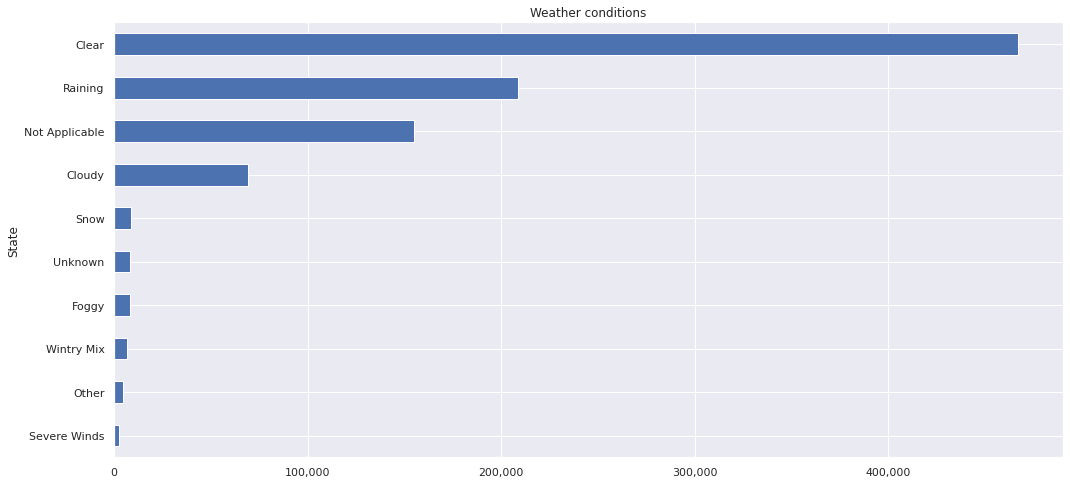

In [ ]:
plt.figure(figsize=(17,8))
ax = newdf['weather_desc'].value_counts().sort_values(ascending=True).tail(10).plot(kind='barh')
ax.set_title("Weather conditions")
ax.set_ylabel("State")
ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ','))
)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

In [ ]:
newdf2 = newdf

In [ ]:
newdf2['weather_desc'].value_counts().reset_index()

,index,weather_desc
0,Clear,466808
1,Raining,208493
2,Not Applicable,155142
3,Cloudy,69106
4,Snow,8926
5,Unknown,8421
6,Foggy,8143
7,Wintry Mix,6415
8,Other,4291
9,Severe Winds,2285


# **Weather vs Hour of accident**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Weather vs Hour_of_Accident')

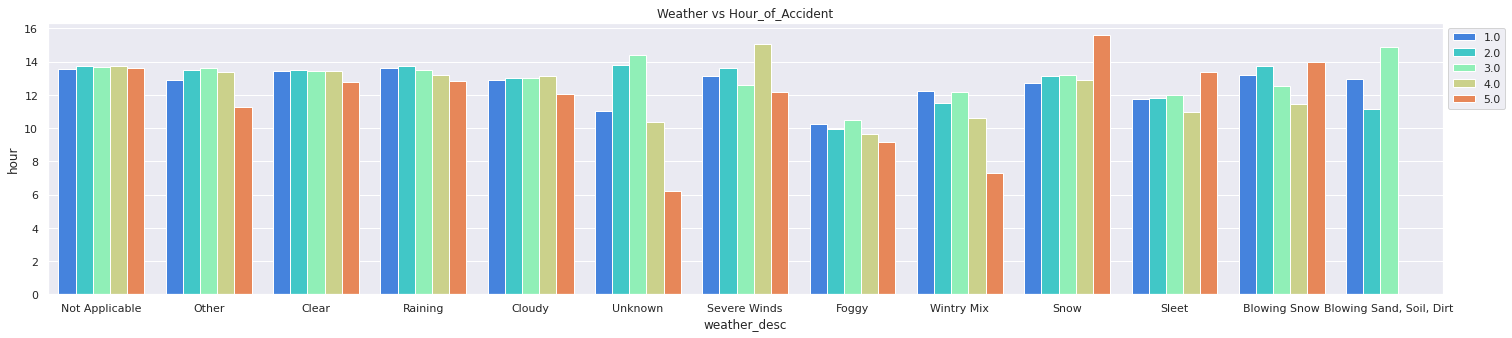

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot('weather_desc','hour',data=newdf2, hue='inj_sever_code',ci=None, palette='rainbow')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Weather vs Hour_of_Accident')


We see that the

## **Severity of Accidents according to the time of day**

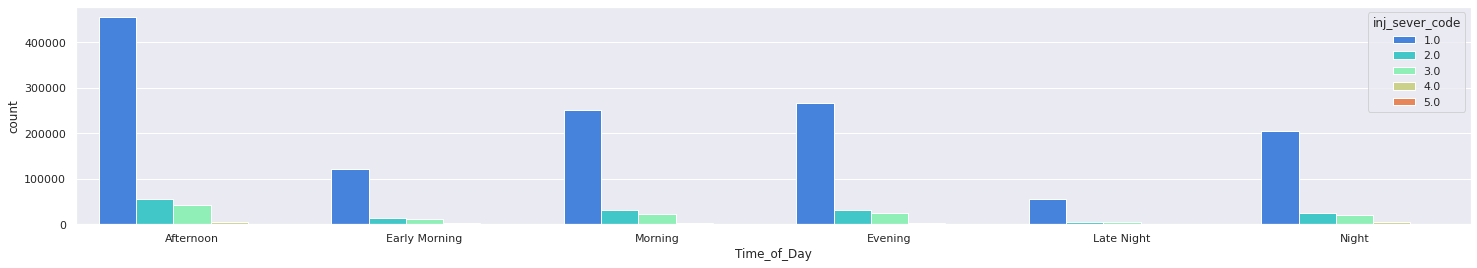

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x='Time_of_Day',data=newdf2,hue='inj_sever_code',palette='rainbow')

We can see that the the maximum number of fatal accidents happened in the afternoon.


### **Weather vs severity of accident**

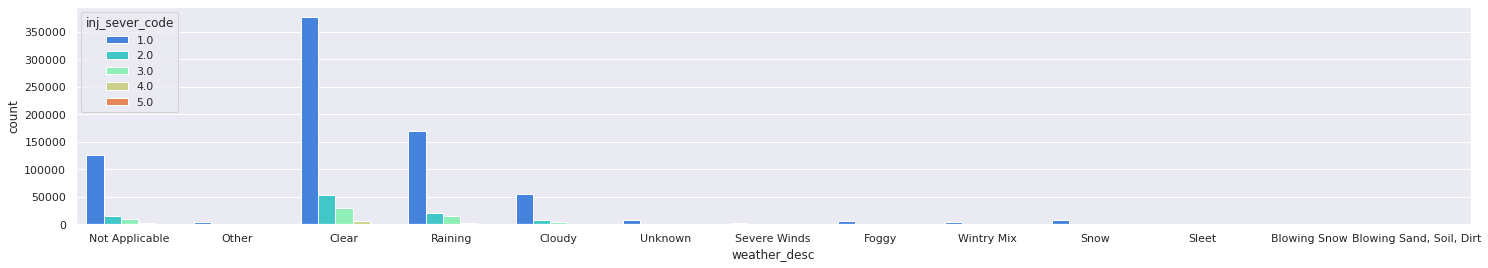

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x='weather_desc',data=newdf2,hue='inj_sever_code',palette='rainbow')

Now we can see that the maximum accidents happened when the wether was clear.
- There are three columns *Unknown* , *Other* which doesn't serve purpose to this analysis.
- The rows which doesn't have any values are replaced as *not applicable*.
- The maximum accidents happening had a severity of 1 which is *Not Injured/Not known*. This gives us an impression that maximum accidents that were happening were non fatal.
- The missing values and the unknown columns are a limitation to this finding.

## **Road Condition in referrence to severity of accident**

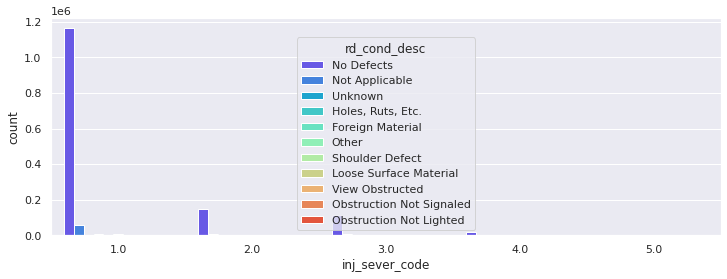

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='inj_sever_code',data=newdf2,hue='rd_cond_desc',palette='rainbow')

Now we can see that the maximum accidents happened on the road which had no defects.
- There are three columns *Unknown* , *Other* which doesn't serve purpose to this analysis.
- The rows which doesn't have any values are replaced as *not applicable*.
- The maximum accidents happening had a severity of 1 which is *Not Injured/Not known*. This gives us an impression that maximum accidents that were happening were non fatal.
- The missing values and the unknown columns are a limitation to this finding.

In [ ]:
newdf2.inj_sever_code.value_counts()

1.0    1352529
2.0     164446
3.0     124828
4.0      19888
5.0       3218
Name: inj_sever_code, dtype: int64

In [ ]:
# Plot the distribution of occurence by time of the day.
# We can see the time of the day mof accidents happen, 4pm-6pm

'''fig, ax = plt.subplots(figsize=(18,3))
sns.histplot(newdf['inj_sever_code'])
plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()'''

'fig, ax = plt.subplots(figsize=(18,3))\nsns.histplot(newdf[\'inj_sever_code\'])\nplt.xlabel("Start Time")\nplt.ylabel("Number of Occurence")\nplt.title(\'Accidents Count By Time of Day\')\n\nplt.show()'

## **Collission type in referrence to severity**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

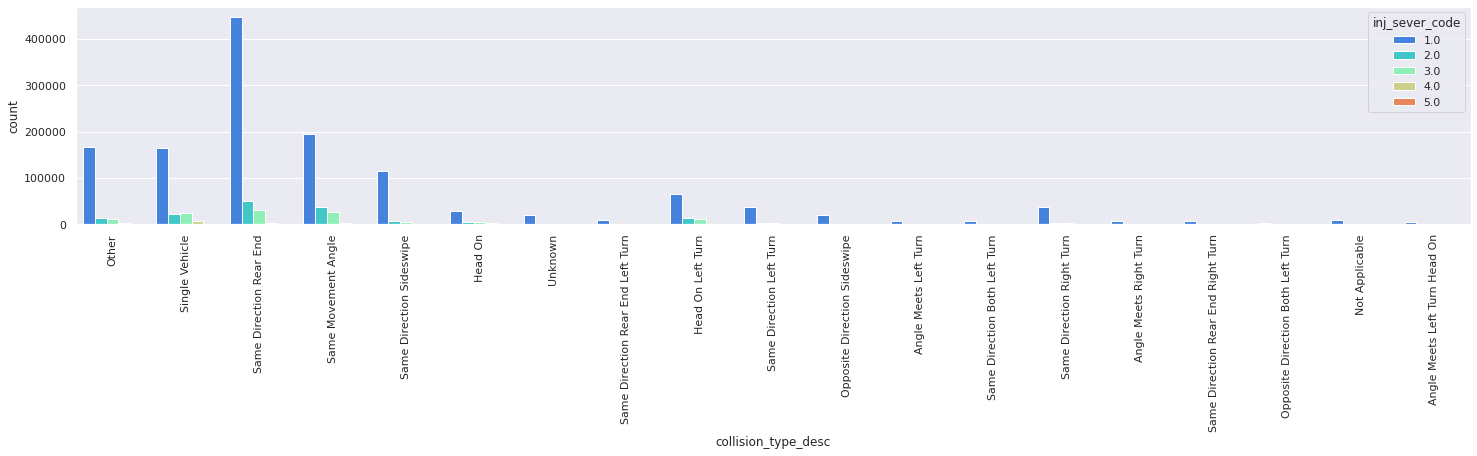

In [ ]:
plt.figure(figsize=(25,4))
sns.countplot(x='collision_type_desc',data=newdf2,hue='inj_sever_code',palette='rainbow')
plt.xticks(rotation=90)

## **Findings**

- Accidents happened frequently on road with no defects, than defected roads. However, looking at the data, much data was not collected for defected road so, this could skew the analysis.

- Surprisingly, most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.

- Maximum accidents were happening in afternoon which was kind of obvious considering the traffic on average is more in the afternoon.

- Maximum non fatal accidents were same direction rear end.